In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
# Combine the data into a single dataset
cityride = pd.merge(ride_df, city_df, on="city", how="outer")
# Display the data table for preview
cityride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

Text(0, 0.5, 'Average Fare ($)')

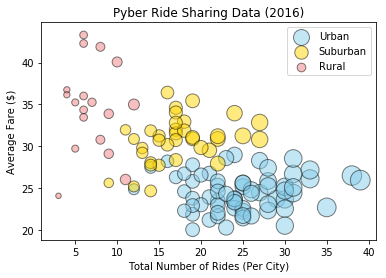

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban = cityride.loc[(cityride["type"] == "Urban")]
suburban = cityride.loc[(cityride["type"] == "Suburban")]
rural = cityride.loc[(cityride["type"] == "Rural")]

avg_fare_urban = urban.groupby(['city'])['fare'].mean()
total_rides_urban = urban.groupby(['city']).count()['ride_id']
total_drivers_urban = urban.groupby(['city'])['driver_count'].value_counts()

avg_fare_suburban = suburban.groupby(['city'])['fare'].mean()
total_rides_suburban = suburban.groupby(['city']).count()['ride_id']
total_drivers_suburban = suburban.groupby(['city'])['driver_count'].value_counts()

avg_fare_rural = rural.groupby(['city'])['fare'].mean()
total_rides_rural = rural.groupby(['city']).count()['ride_id']
total_drivers_rural = rural.groupby(['city'])['driver_count'].value_counts()

# Build the scatter plots for each city types


plt.scatter(total_rides_urban, avg_fare_urban,s=total_drivers_urban*10,
            marker ='o', facecolors ="skyblue", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban, avg_fare_suburban,s=total_drivers_suburban*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural, avg_fare_rural,s=total_drivers_rural*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Rural")

# Incorporate the other graph properties

# Create a legend
plt.legend(loc="best")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
          
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../Images/PyberRideSharing.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

([<matplotlib.patches.Wedge at 0x1b24344cf60>,
 [Text(-0.2335959431524779, 1.0749106638891925, 'Rural'),
  Text(-1.0810743900820368, 0.2031702810667751, 'Suburban'),
  Text(1.0132714380149224, -0.4281132944714185, 'Urban')],
 [Text(-0.12741596899226065, 0.5863149075759231, '6.8%'),
  Text(-0.5896769400447472, 0.11082015330915004, '30.5%'),
  Text(0.5526935116445031, -0.23351634243895553, '62.7%')])

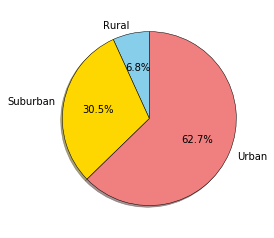

In [12]:
# Calculate Type Percents
neighborhood_type = cityride.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

fare_sum = neighborhood_type.sum()['fare']

# Build Pie Chart
labels = fare_sum.index
colors = ["lightcoral","gold","skyblue"]
explode = [0 , 0, 0]
plt.pie(fare_sum, startangle = 90, colors = colors, 
        explode = explode, labels = labels, autopct = "%1.1f%%", 
        shadow = False, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.axis("equal")
# Save Figure
plt.savefig("../Images/PyberRideSharing.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x1b2444a7fd0>,
 [Text(-0.1722557971865506, 1.0864289854084463, 'Rural'),
  Text(-1.0064468365946808, 0.4439197732795421, 'Suburban'),
  Text(0.9245140062812702, -0.59604853174029, 'Urban')],
 [Text(-0.09395770755630033, 0.5925976284046071, '5.0%'),
  Text(-0.5489710017789168, 0.24213805815247746, '26.8%'),
  Text(0.504280367062511, -0.3251173809492491, '68.2%')])

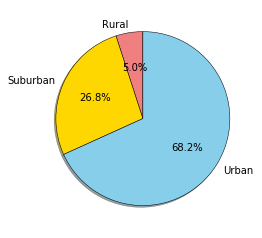

In [14]:
# Calculate Ride Percents
ride_sum = neighborhood_type.sum()['ride_id']
# Build Pie Chart
labels = ride_sum.index
colors = ["lightcoral","gold","skyblue"]
explode = [0 , 0, 0]
plt.pie(ride_sum, startangle = 90, colors = colors, 
        explode = explode, labels = labels, autopct = "%1.1f%%", 
        shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.axis("equal")
# Save Figure
plt.savefig("../Images/PyberRideSharing.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

([<matplotlib.patches.Wedge at 0x1b242fdb518>,
 [Text(-0.02700595609061982, 1.0996684401835088, 'Rural'),
  Text(-0.4694828155709783, 0.9947793151667093, 'Suburban'),
  Text(0.44491856107515704, -1.0060057027725102, 'Urban')],
 [Text(-0.014730521503974445, 0.5998191491910048, '0.8%'),
  Text(-0.25608153576598813, 0.5426068991818414, '12.5%'),
  Text(0.24268285149554017, -0.54873038333046, '86.7%')])

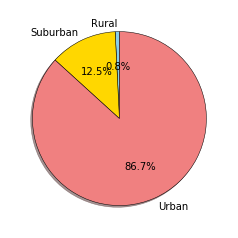

In [10]:
# Calculate Driver Percents
driver_sum = neighborhood_type.sum()['driver_count']
# Build Pie Charts
labels = driver_sum.index
colors = ["lightcoral","gold","skyblue"]
explode = [0 , 0, 0]
plt.pie(driver_sum, startangle = 90, colors = colors, 
        explode = explode, labels = labels, autopct = "%1.1f%%", 
        shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.axis("equal")
# Save Figure
plt.savefig("../Images/PyberRideSharing.png")

In [9]:
# Show Figure
plt.show()